In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [3]:
df.shape

(12283, 12)

In [4]:
# device = df["device"].tolist()
# # Convertir cada cadena JSON a un diccionario y almacenarlo en una lista
# data = [json.loads(json_data) for json_data in device]

# # Normalizar los datos
# df = pd.json_normalize(data)

In [5]:

diccionarios = ['device','geoNetwork','trafficSource','totals']

df_traffic = df[diccionarios]

In [6]:

# Iteramos sobre las columnas del diccionario
for columna in diccionarios:
    # Convertimos cada línea de la columna a un diccionario JSON y luego creamos un DataFrame con ellas
    df_nuevo = pd.DataFrame([json.loads(linea) for linea in df_traffic[columna]])
    # Unimos el nuevo DataFrame con el DataFrame principal df_traffic
    df_traffic = df_traffic.join(df_nuevo)


In [7]:
# Eliminar columnas
columnas_a_eliminar = ['device', 'geoNetwork', 'trafficSource', 'totals']
df_traffic = df_traffic.drop(columnas_a_eliminar, axis=1)

In [8]:
df_traffic.head()

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availabl

In [9]:

df_traffic['bounces'].value_counts()

1    6172
Name: bounces, dtype: int64

In [10]:

# columnas a conservar
columnas_deseadas = ['browser', 'operatingSystem', 'isMobile', 'deviceCategory', 'subContinent',
                     'source', 'medium', 'isTrueDirect', 'hits', 'pageviews','bounces', 'newVisits', 'transactionRevenue']

df_traffic = df_traffic[columnas_deseadas].copy()

In [11]:
df_traffic.head()

,browser,operatingSystem,isMobile,deviceCategory,subContinent,source,medium,isTrueDirect,hits,pageviews,bounces,newVisits,transactionRevenue
0,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN
1,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN
2,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN
3,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN
4,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN


In [12]:
diccionarios

['device', 'geoNetwork', 'trafficSource', 'totals']

In [13]:
# Eliminar columnas
columnas_a_eliminar = ['device', 'geoNetwork', 'trafficSource', 'totals', 'sessionId', 'visitId']

df2 = df.drop(columnas_a_eliminar, axis=1)


In [14]:
df2.head()


,channelGrouping,date,fullVisitorId,socialEngagementType,visitNumber,visitStartTime
0,Organic Search,20160902,9674781571160116268,Not Socially Engaged,1,1472804607
1,Organic Search,20160902,8590648239310839049,Not Socially Engaged,1,1472835928
2,Affiliates,20160902,9772828344252850532,Not Socially Engaged,1,1472856802
3,Organic Search,20160902,1350700416054916432,Not Socially Engaged,2,1472879649
4,Organic Search,20160902,1350700416054916432,Not Socially Engaged,1,1472829671


In [15]:
# Concatenación a lo largo de las columnas
df3 = pd.concat([df2, df_traffic], axis=1)

In [16]:
df3.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,subContinent,source,medium,isTrueDirect,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,Not Socially Engaged,1,1472804607,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,Not Socially Engaged,1,1472835928,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,Not Socially Engaged,1,1472856802,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,Not Socially Engaged,2,1472879649,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,Not Socially Engaged,1,1472829671,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN


In [17]:

# Nombres
nuevos_nombres = {
    'channelGrouping': 'agrupacion_canal',
    'date': 'fecha',
    'fullVisitorId': 'id_visitante_completo',
    'socialEngagementType': 'tipo_interaccion_social',
    'visitNumber': 'numero_visita',
    'visitStartTime': 'hora_inicio_visita',
    'browser': 'navegador',
    'operatingSystem': 'sistema_operativo',
    'isMobile': 'es_movil',
    'deviceCategory': 'categoria_dispositivo',
    'subContinent': 'subcontinente',
    'source': 'fuente',
    'medium': 'medio',
    'isTrueDirect': 'es_directo_verdadero',
    'hits': 'visitas',
    'pageviews': 'paginas_vistas',
    'bounces': 'rebotes',
    'newVisits': 'nuevas_visitas',
    'transactionRevenue': 'ingresos_transaccion'
}


# nombres de las columnas
df3.rename(columns=nuevos_nombres, inplace=True)


In [18]:
df3.head()

,agrupacion_canal,fecha,id_visitante_completo,tipo_interaccion_social,numero_visita,hora_inicio_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente,medio,es_directo_verdadero,visitas,paginas_vistas,rebotes,nuevas_visitas,ingresos_transaccion
0,Organic Search,20160902,9674781571160116268,Not Socially Engaged,1,1472804607,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,Not Socially Engaged,1,1472835928,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,Not Socially Engaged,1,1472856802,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,Not Socially Engaged,2,1472879649,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,Not Socially Engaged,1,1472829671,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN


In [19]:
df3['fecha'] = pd.to_datetime(df3['fecha'], format='%Y%m%d')

In [20]:
# Convertir la marca de tiempo Unix a datetime
df3['hora_inicio_visita'] = pd.to_datetime(df3['hora_inicio_visita'], unit='s')


In [21]:
df3.tail()

,agrupacion_canal,fecha,id_visitante_completo,tipo_interaccion_social,numero_visita,hora_inicio_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente,medio,es_directo_verdadero,visitas,paginas_vistas,rebotes,nuevas_visitas,ingresos_transaccion
12278,Social,2017-01-04,7330357551242339916,Not Socially Engaged,1,2017-01-04 14:36:48,Chrome,Windows,False,desktop,Eastern Europe,youtube.com,referral,NaN,1,1,1,1,NaN
12279,Social,2017-01-04,696320405243257438,Not Socially Engaged,1,2017-01-05 01:40:07,Chrome,Android,True,mobile,Western Europe,youtube.com,referral,NaN,1,1,1,1,NaN
12280,Social,2017-01-04,5437703324867866371,Not Socially Engaged,1,2017-01-05 04:55:22,Chrome,Linux,False,desktop,Southern Asia,youtube.com,referral,NaN,1,1,1,1,NaN
12281,Social,2017-01-04,8869363093179043393,Not Socially Engaged,2,2017-01-05 07:38:47,Chrome,Android,True,mobile,Northern Europe,youtube.com,referral,True,2,2,NaN,NaN,NaN
12282,Social,2017-01-04,2905034275926274980,Not Socially Engaged,1,2017-01-05 05:22:17,Android Webview,Android,True,tablet,Southern Africa,youtube.com,referral,NaN,3,3,NaN,1,NaN


In [22]:
# Crear la columna de mes
df3['mes'] = df3['hora_inicio_visita'].dt.month

# Crear la columna de día
df3['dia'] = df3['hora_inicio_visita'].dt.day

# Crear la columna de año
df3['año'] = df3['hora_inicio_visita'].dt.year

# Crear la columna de hora
df3['hora'] = df3['hora_inicio_visita'].dt.hour

In [23]:
df3.head()

,agrupacion_canal,fecha,id_visitante_completo,tipo_interaccion_social,numero_visita,hora_inicio_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente,medio,es_directo_verdadero,visitas,paginas_vistas,rebotes,nuevas_visitas,ingresos_transaccion,mes,dia,año,hora
0,Organic Search,2016-09-02,9674781571160116268,Not Socially Engaged,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN,9,2,2016,8
1,Organic Search,2016-09-02,8590648239310839049,Not Socially Engaged,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN,9,2,2016,17
2,Affiliates,2016-09-02,9772828344252850532,Not Socially Engaged,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN,9,2,2016,22
3,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN,9,3,2016,5
4,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN,9,2,2016,15


In [24]:
df3['hora'].unique()

array([ 8, 17, 22,  5, 15, 14, 16,  6, 10, 19, 12,  2,  3,  9, 18,  4, 13,
       21,  1, 11, 20, 23,  7,  0])

In [25]:
# Definir una función para asignar etiquetas basadas en la hora
def asignar_periodo(hora):
    if 6 <= hora < 12:
        return 'mañana'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'noche'
    else:
        return 'madrugada'


# Crear una nueva columna 'periodo' aplicando la función a la columna 'hora'
df3['periodo'] = df3['hora'].apply(asignar_periodo)

In [26]:
df3.head()

,agrupacion_canal,fecha,id_visitante_completo,tipo_interaccion_social,numero_visita,hora_inicio_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente,medio,es_directo_verdadero,visitas,paginas_vistas,rebotes,nuevas_visitas,ingresos_transaccion,mes,dia,año,hora,periodo
0,Organic Search,2016-09-02,9674781571160116268,Not Socially Engaged,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN,9,2,2016,8,mañana
1,Organic Search,2016-09-02,8590648239310839049,Not Socially Engaged,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN,9,2,2016,17,tarde
2,Affiliates,2016-09-02,9772828344252850532,Not Socially Engaged,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN,9,2,2016,22,noche
3,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN,9,3,2016,5,madrugada
4,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN,9,2,2016,15,tarde


In [27]:
df3['dia'].unique()

array([ 2,  3, 26, 27, 23, 24, 12, 13,  4, 11, 14, 19, 18, 10, 21, 22,  1,
       30, 20, 25, 15, 29, 16, 31, 28,  9, 17,  5,  6,  8,  7])

In [28]:
# Crear una nueva columna 'dia_semana' que contenga el nombre del día de la semana
df3['dia_semana'] = df3['hora_inicio_visita'].dt.strftime('%A')

In [29]:
df3.head()

,agrupacion_canal,fecha,id_visitante_completo,tipo_interaccion_social,numero_visita,hora_inicio_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente,medio,es_directo_verdadero,visitas,paginas_vistas,rebotes,nuevas_visitas,ingresos_transaccion,mes,dia,año,hora,periodo,dia_semana
0,Organic Search,2016-09-02,9674781571160116268,Not Socially Engaged,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN,9,2,2016,8,mañana,Friday
1,Organic Search,2016-09-02,8590648239310839049,Not Socially Engaged,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN,9,2,2016,17,tarde,Friday
2,Affiliates,2016-09-02,9772828344252850532,Not Socially Engaged,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN,9,2,2016,22,noche,Friday
3,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN,9,3,2016,5,madrugada,Saturday
4,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN,9,2,2016,15,tarde,Friday


In [30]:
df3['dia_semana'].unique()

array(['Friday', 'Saturday', 'Thursday', 'Sunday', 'Monday', 'Wednesday',
       'Tuesday'], dtype=object)

In [31]:
# Eliminar columnas
columnas_a_eliminar = ['fecha', 'id_visitante_completo', 'hora_inicio_visita', 'dia', 'año', 'hora', 'tipo_interaccion_social']

df4 = df3.drop(columnas_a_eliminar, axis=1)

In [32]:
df4.head()

,agrupacion_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente,medio,es_directo_verdadero,visitas,paginas_vistas,rebotes,nuevas_visitas,ingresos_transaccion,mes,periodo,dia_semana
0,Organic Search,1,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,NaN,9,mañana,Friday
1,Organic Search,1,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,NaN,9,tarde,Friday
2,Affiliates,1,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,NaN,9,noche,Friday
3,Organic Search,2,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,NaN,9,madrugada,Saturday
4,Organic Search,1,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,NaN,9,tarde,Friday


In [33]:
import pandas as pd


df4.rename(columns={
    'agrupacion_canal': 'grupo_canal',
    'tipo_interaccion_social': 'tipo_interaccion_social',
    'numero_visita': 'cantidad_visitas',
    'navegador': 'navegador',
    'sistema_operativo': 'sistema_operativo',
    'es_movil': 'es_movil',
    'categoria_dispositivo': 'categoria_dispositivo',
    'subcontinente': 'subcontinente',
    'fuente': 'fuente_trafico',
    'medio': 'medio_trafico',
    'es_directo_verdadero': 'es_directo',
    'visitas': 'cantidad_visitas',
    'paginas_vistas': 'paginas_vistas',
    'rebotes': 'rebotes',
    'nuevas_visitas': 'nuevas_visitas',
    'ingresos_transaccion': 'ingresos_transaccion',
    'mes': 'mes',
    'periodo': 'periodo_del_dia',
    'dia_semana': 'dia_semana'
}, inplace=True)


In [34]:

columna_a_mover = 'ingresos_transaccion'

# Guarda la columna en una variable temporal
columna_temporal = df4[columna_a_mover]

# Elimina la columna de su posición original
df4.drop(columns=[columna_a_mover], inplace=True)

# Inserta la columna al principio del DataFrame
df4.insert(0, columna_a_mover, columna_temporal)

In [35]:
df4.head()

,ingresos_transaccion,grupo_canal,cantidad_visitas,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,rebotes,nuevas_visitas,mes,periodo_del_dia,dia_semana
0,NaN,Organic Search,1,Chrome,Windows,False,desktop,Southeast Asia,google,organic,NaN,1,1,1,1,9,mañana,Friday
1,NaN,Organic Search,1,Chrome,Macintosh,False,desktop,Eastern Europe,google,organic,NaN,1,1,1,1,9,tarde,Friday
2,NaN,Affiliates,1,Chrome,Macintosh,False,desktop,South America,Partners,affiliate,NaN,1,1,1,1,9,noche,Friday
3,NaN,Organic Search,2,Safari,iOS,True,mobile,Northern America,google,organic,True,1,1,1,NaN,9,madrugada,Saturday
4,NaN,Organic Search,1,Safari,iOS,True,mobile,Northern America,google,organic,NaN,5,4,NaN,1,9,tarde,Friday


In [49]:
df4['ingresos_transaccion'].value_counts()

13590000     3
19190000     3
33590000     3
31490000     2
69990000     2
            ..
22490000     1
74850000     1
32490000     1
239880000    1
25240000     1
Name: ingresos_transaccion, Length: 146, dtype: int64

<Axes: >

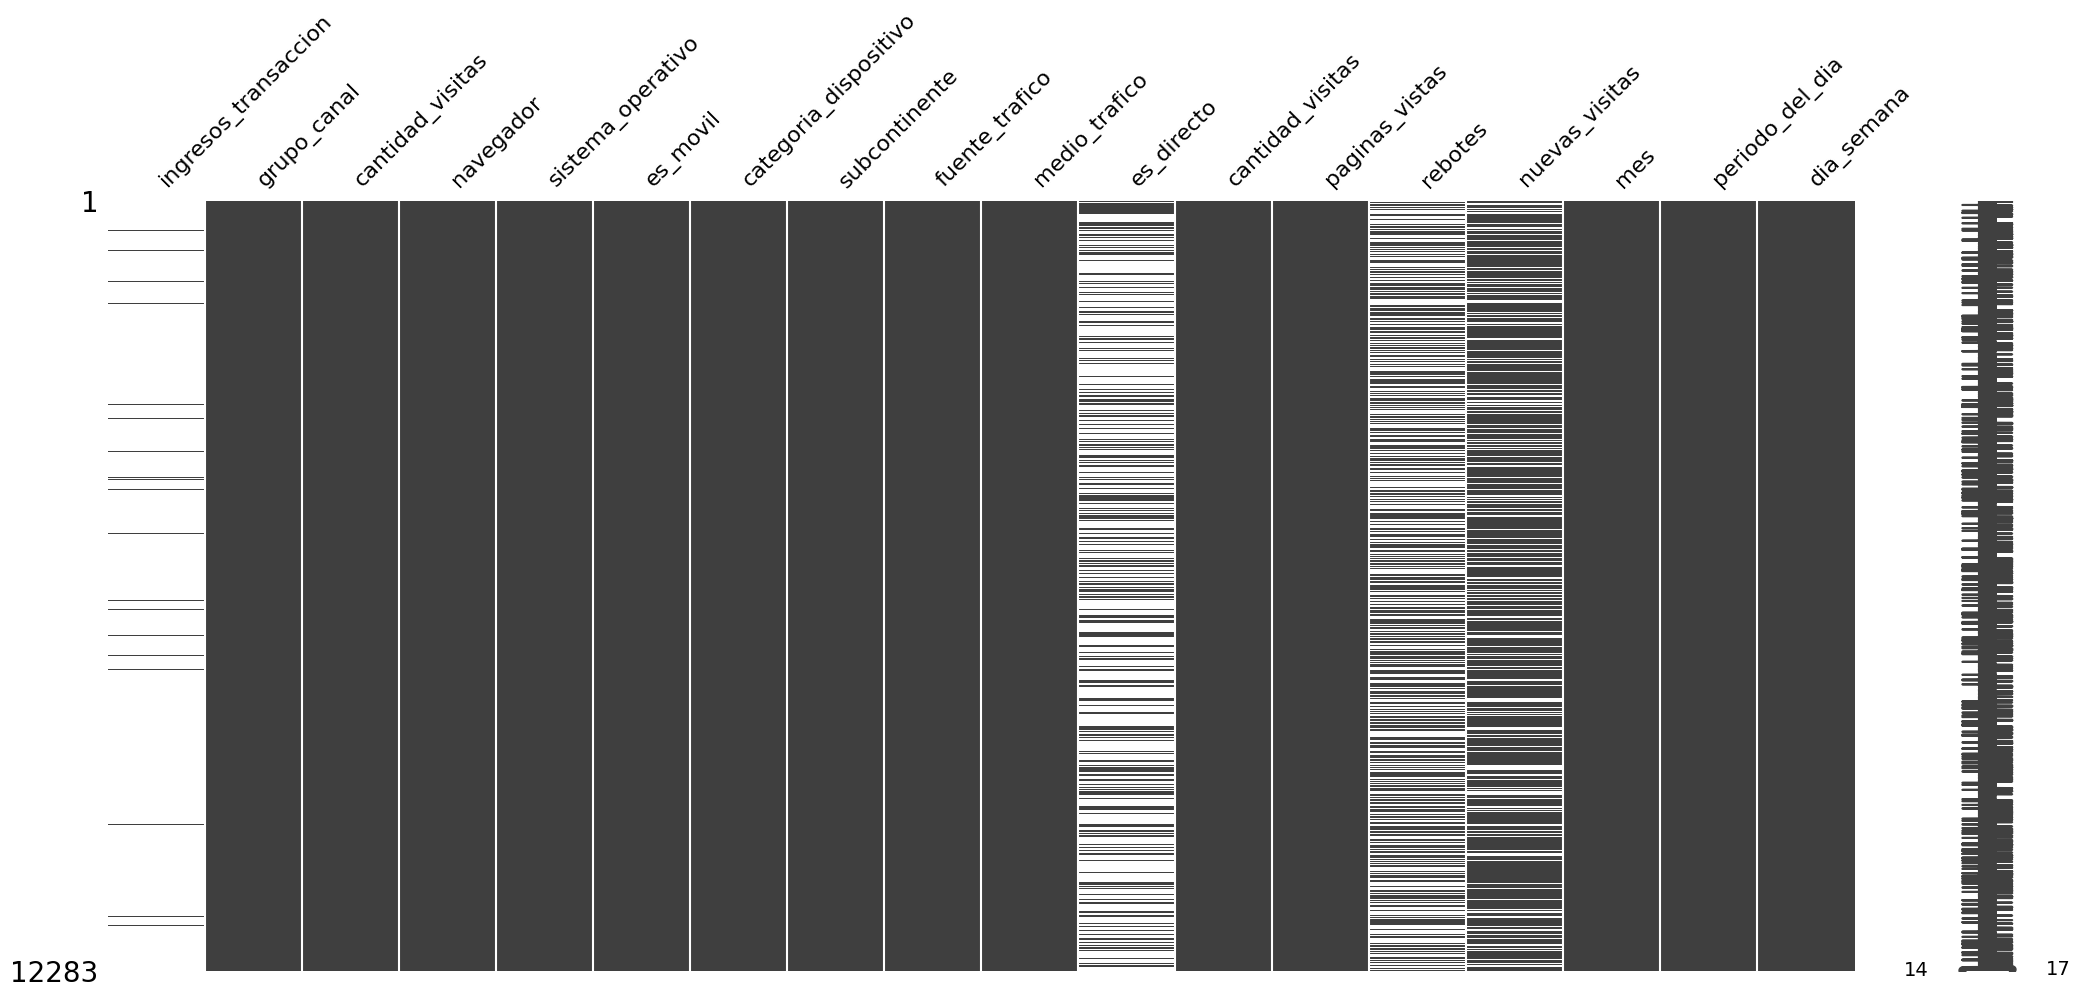

In [38]:
import missingno as msno

# msno.matrix para visualizar los valores nulos
msno.matrix(df4)

In [50]:
df4['es_directo'].fillna(False, inplace=True)
df4['rebotes'].fillna(0, inplace=True)
df4['nuevas_visitas'].fillna(0, inplace=True)
df4['ingresos_transaccion'].fillna(0, inplace=True)

<Axes: >

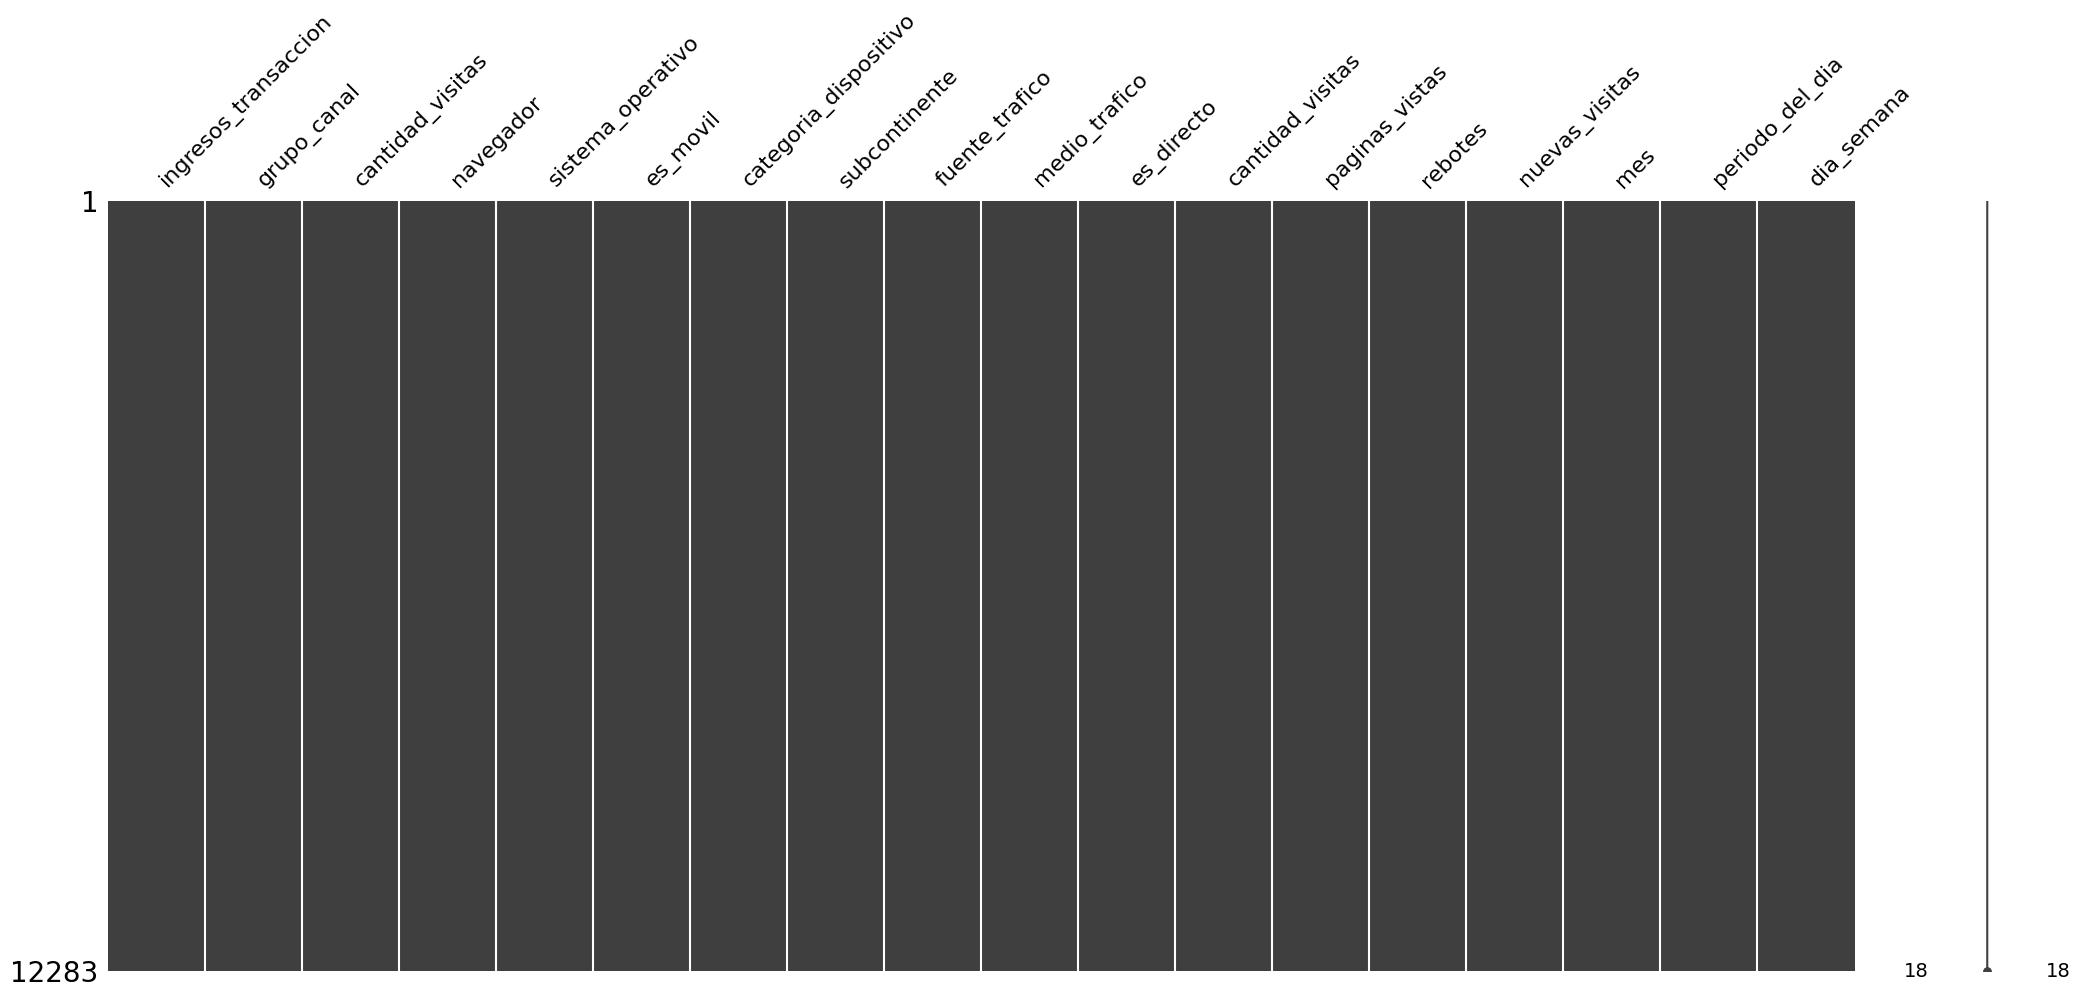

In [51]:
msno.matrix(df4)

In [52]:
df4.to_csv('PrediccionGasto.csv', index=False)

In [53]:
df4['ingresos_transaccion'].value_counts()

0           12119
13590000        3
33590000        3
19190000        3
27190000        2
            ...  
24730000        1
6990000         1
14480000        1
95180000        1
25240000        1
Name: ingresos_transaccion, Length: 147, dtype: int64